# Preprocessing C161

This notebook visualizes and compiles the input data for the combined retrieval from flight B984.

In [1]:
%load_ext autoreload
%autoreload 2
from joint_flight.notebook import *
from joint_flight import plot_observations
from joint_flight.data.c161 import *

No environment variable JOINT_FLIGHT_PATH found. Will look in /home/simonpf/src/joint_flightfor the joint flight data.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:1026: RuntimeWarning: overflow encountered in add
  result = self.f(da, db, *args, **kwargs)
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:1026: RuntimeWarning: overflow encountered in add
  result = self.f(da, db, *args, **kwargs)


## Overview

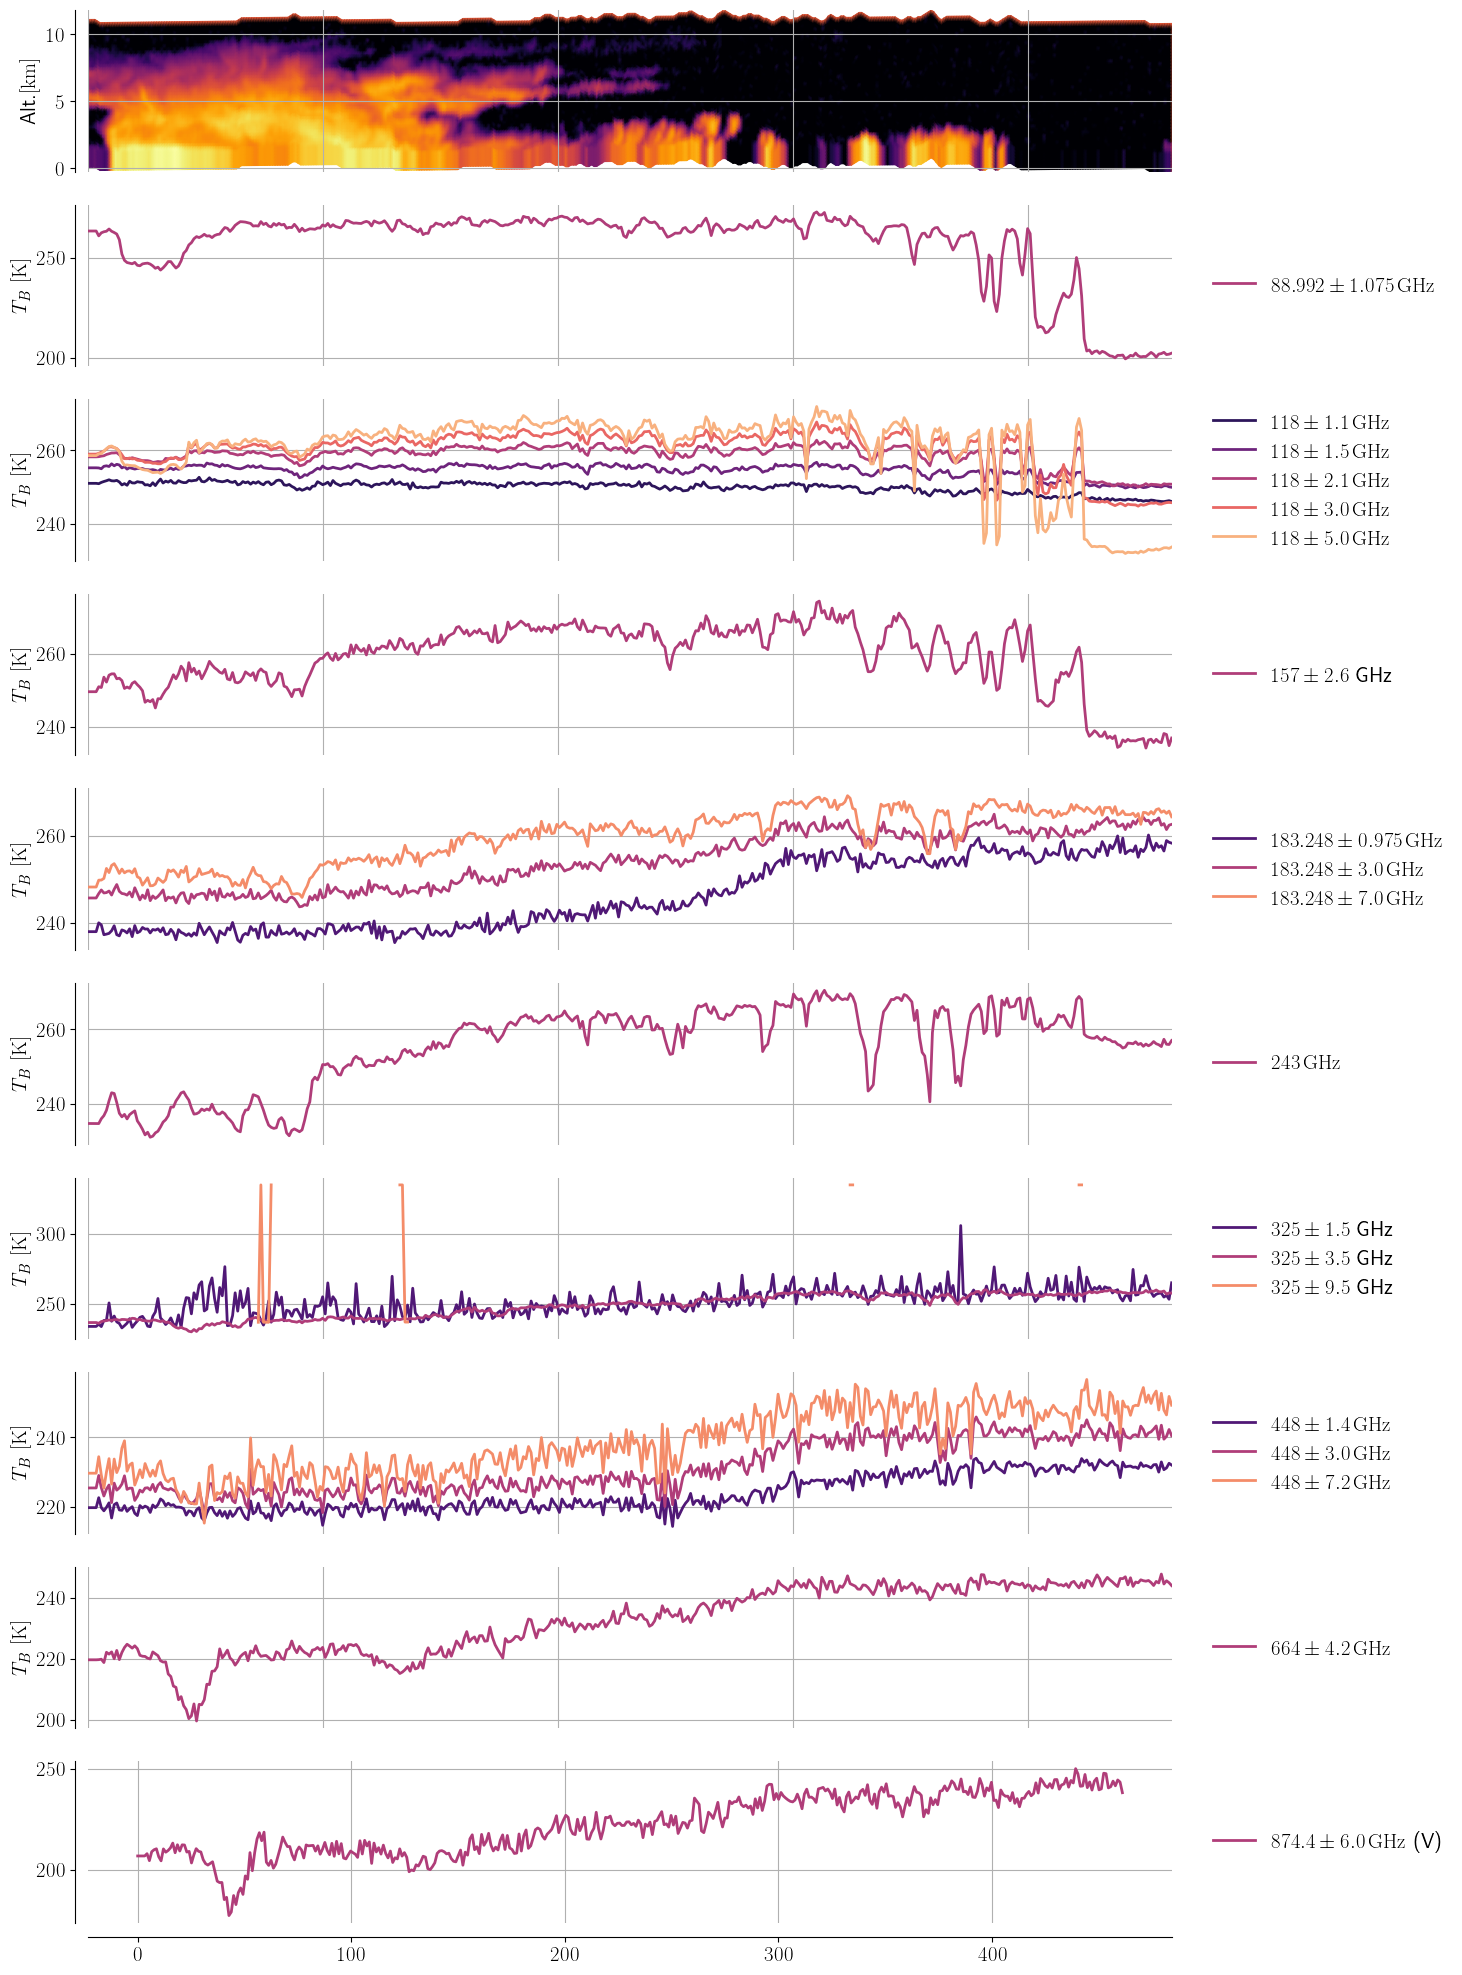

In [2]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(15, 20))
gs = GridSpec(10, 2, width_ratios=[1.0, 0.1])
axs = [f.add_subplot(gs[i, 0]) for i in range(10)]
legends = [f.add_subplot(gs[i, 1]) for i in range(10)]


plot_observations(ISMAR, MARSS, RADAR, axs=axs, legends=legends)
plt.show()

## Atmospheric background

In [3]:
ATMOSPHERE

<xarray.Dataset>
Dimensions:                  (observations: 422, levels: 45)
Dimensions without coordinates: observations, levels
Data variables:
    pressure                 (observations, levels) float64 9.829e+04 ... 2.3...
    temperature              (observations, levels) float64 280.1 ... 217.7
    relative_humidity        (observations, levels) float64 0.9399 ... 0.3784
    water_vapor              (observations, levels) float64 0.009564 ... 3.22...
    oxygen                   (observations, levels) float64 0.2092 ... 0.2091
    ozone                    (observations, levels) float64 2.95e-08 ... 6.24...
    nitrogen                 (observations, levels) float64 0.7815 ... 0.7815
    cloud_water              (observations, levels) float64 1.398e-05 ... 0.0
    u10                      (observations) float64 4.014 4.042 ... 11.54 11.56
    v10                      (observations) float64 8.325 8.37 ... 9.852 9.828
    sea_surface_temperature  (observations) float64 nan nan nan ... 281.2 281.2
    skin_temperature         (observations) float64 282.0 282.0 ... 281.2 281.2

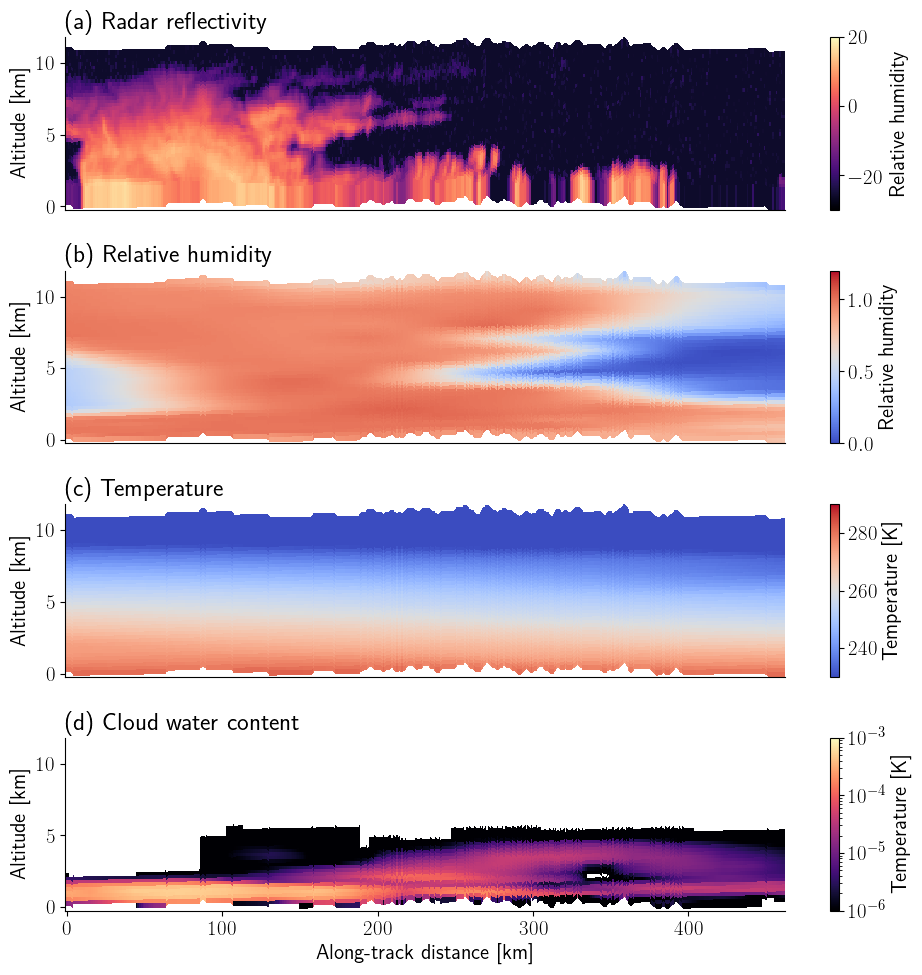

array([<AxesSubplot:title={'left':'(a) Radar reflectivity'}, ylabel='Altitude [km]'>,
       <AxesSubplot:title={'left':'(b) Relative humidity'}, ylabel='Altitude [km]'>,
       <AxesSubplot:title={'left':'(c) Temperature'}, ylabel='Altitude [km]'>,
       <AxesSubplot:title={'left':'(d) Cloud water content'}, xlabel='Along-track distance [km]', ylabel='Altitude [km]'>],
      dtype=object)

In [4]:
from joint_flight import plot_atmosphere
from matplotlib.colors import Normalize, LogNorm

plot_atmosphere(RADAR, ATMOSPHERE)

## Observations
### Marss

In [5]:
from matplotlib.colors import Normalize

def plot_channels(data, names):
    f, axs = plt.subplots(2, 1)
    
    x = RADAR.d / 1e3
    x_min = x.min()
    x_max = x.max()
    
    ax = axs[0]
    for d, n in zip(data, names):
        ax.plot(x, d, label=n)
    ax.legend(bbox_to_anchor=[1.0, 0.5])
    ax.set_xlim([x_min, x_max])
        
    ax = axs[1]
    y = RADAR.y
    x = RADAR.x / 1e3
    dbz = RADAR.dbz
    
    print(dbz)
    ax.pcolormesh(x, y / 1e3, dbz, norm=Normalize(-20, 20))
    ax.set_ylim(0, 11)
    ax.set_xlim([x_min, x_max])
    plt.show()

In [6]:
MARSS

<xarray.Dataset>
Dimensions:                  (rays: 422, channel: 5)
Coordinates:
  * channel                  (channel) |S9 b'M16-89' b'M17-157' ... b'M20-183+7'
Dimensions without coordinates: rays
Data variables:
    latitude                 (rays) float32 54.65 54.65 54.65 ... 58.57 58.58
    longitude                (rays) float32 -3.418 -3.418 ... -5.58 -5.585
    brightness_temperatures  (rays, channel) float32 263.2 249.6 ... 262.7 264.4
    errors                   (rays, channel) float32 0.01143 ... 0.08611
    altitude                 (rays) float32 9.903e+03 9.903e+03 ... 9.534e+03
    time                     (rays) datetime64[ns] 2019-03-22T13:49:58.554687...

In [7]:
n_rays = RADAR.d.size
y_marss = np.zeros((n_rays, 5))
y_marss_nedt = np.zeros((n_rays, 5))
tbs_marss = MARSS["brightness_temperatures"]
errors_marss = MARSS["errors"]

### 89 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


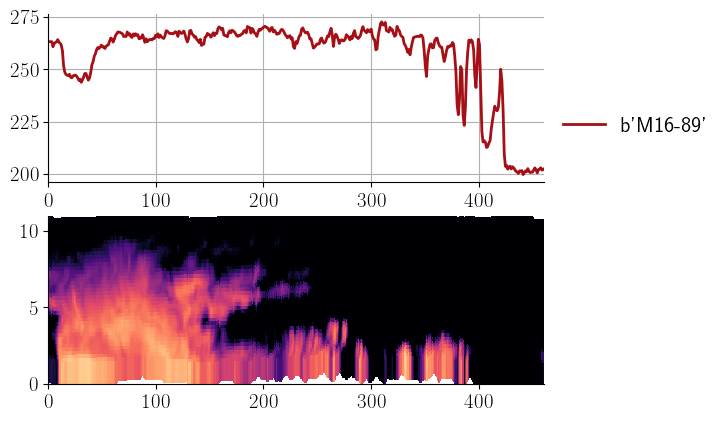

In [8]:
data = [
    tbs_marss[:, 0],
]
names = map(lambda x: x.data, MARSS.channel[:1])
plot_channels(data, names)

In [9]:
y_marss[:, 0] = tbs_marss[:, 0]
y_marss_nedt[:, 0] = errors_marss[:, 0] + 1e6 * SURFACE_MASK.data

### 157 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


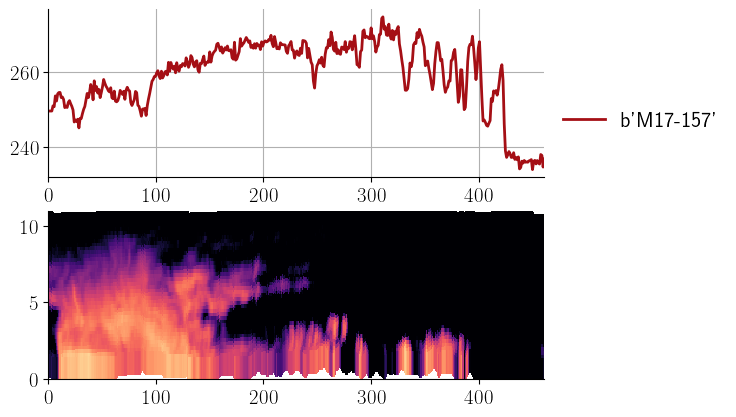

In [10]:
data = [
    tbs_marss[:, 1],
]
names = map(lambda x: x.data, MARSS.channel[1:2])
plot_channels(data, names)

In [11]:
y_marss[:, 1] = tbs_marss[:, 1]
y_marss_nedt[:, 1] = errors_marss[:, 1] + 1e6 * SURFACE_MASK.data

### 183 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


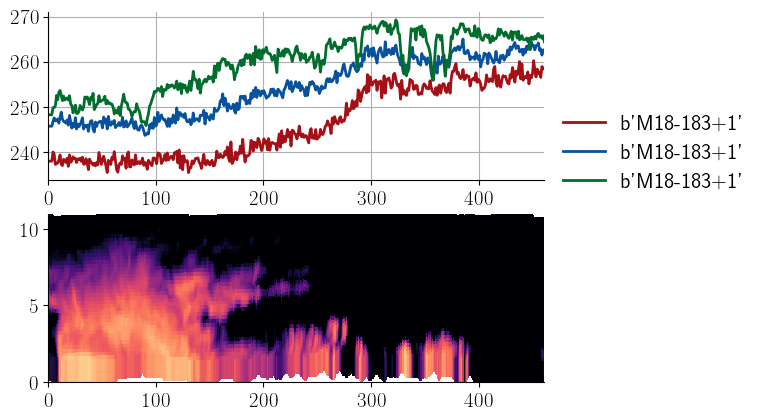

In [12]:
data = [
    tbs_marss[:, 2:],
]
names = map(lambda x: x.data, MARSS.channel[2:])
plot_channels(data, names)

In [13]:
y_marss[:, 2:] = tbs_marss[:, 2:]
y_marss_nedt[:, 2:] = errors_marss[:, 2:]

## ISMAR

In [14]:
y_ismar = np.zeros((n_rays, 12))
y_ismar_nedt = np.zeros((n_rays, 12))
tbs_ismar = ISMAR.brightness_temperatures.data
errors_ismar = ISMAR.errors.data

### 118 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


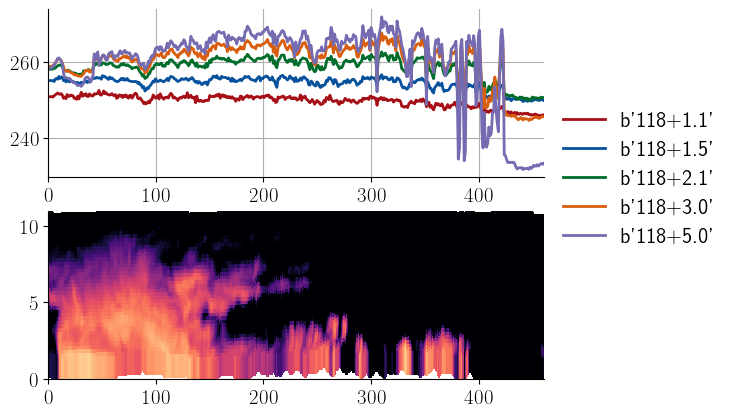

In [15]:
data = [
    tbs_ismar[:, 0],
    tbs_ismar[:, 1],
    tbs_ismar[:, 2],
    tbs_ismar[:, 3],
    tbs_ismar[:, 4],
]
names = map(lambda x: x.data, ISMAR.channel[:5])
plot_channels(data, names)

In [16]:
y_ismar[:, :5] = tbs_ismar[:, :5]
y_ismar_nedt[:, :5] = errors_ismar[:, :5]
y_ismar_nedt[:, 1:5] += SURFACE_MASK.data.reshape(-1, 1) * 1e6

### 243 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


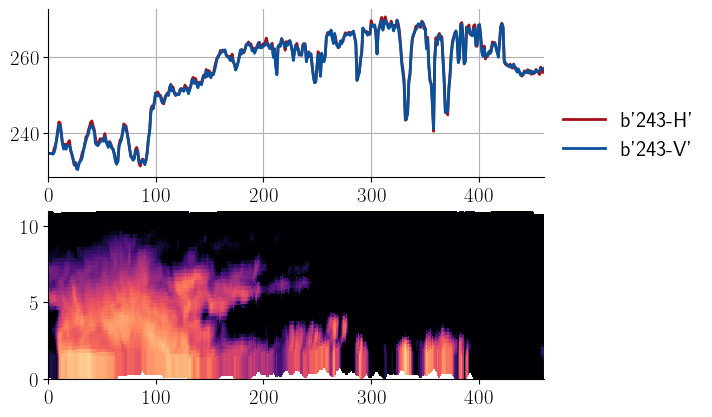

In [17]:
data = [
    tbs_ismar[:, 5],
    tbs_ismar[:, 6]
]
names = map(lambda x: x.data, ISMAR.channel[5:7])
plot_channels(data, names)

In [18]:
y_ismar[:, 5] = 0.5 * (tbs_ismar[:, 5] + tbs_ismar[:, 6])
y_ismar_nedt[:, 5] = errors_ismar[:, 5]

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


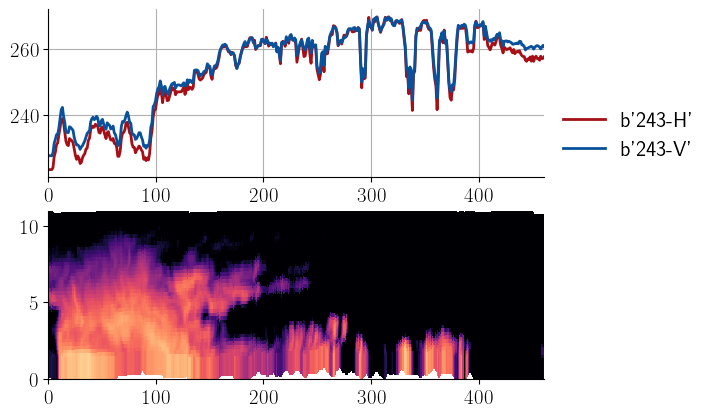

In [19]:
from joint_flight.data.c161 import ISMAR_30

tbs_ismar_30 = ISMAR_30["brightness_temperatures"].data
data = [
    tbs_ismar_30[:, 5],
    tbs_ismar_30[:, 6]
]
names = map(lambda x: x.data, ISMAR.channel[5:7])
plot_channels(data, names)

## 325 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


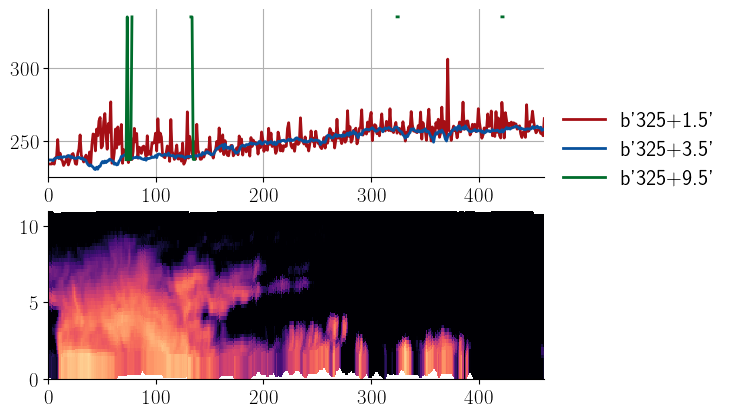

In [20]:
data = [
    tbs_ismar[:, 7],
    tbs_ismar[:, 8],
    tbs_ismar[:, 9],
]
names = map(lambda x: x.data, ISMAR.channel[7:10])
plot_channels(data, names)

In [21]:
y_ismar[:, 6] = tbs_ismar[:, 8]
y_ismar_nedt[:, 6] = errors_ismar[:, 8]

## 424 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


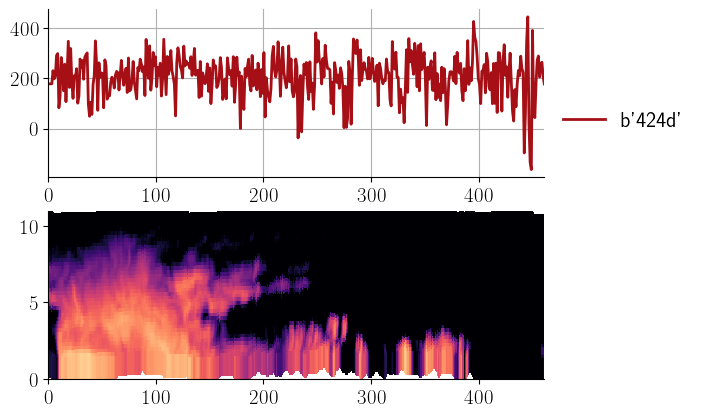

In [22]:
data = [
    tbs_ismar[:, 13]
]
names = map(lambda x: x.data, ISMAR.channel[[13]])
plot_channels(data, names)

## 448 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


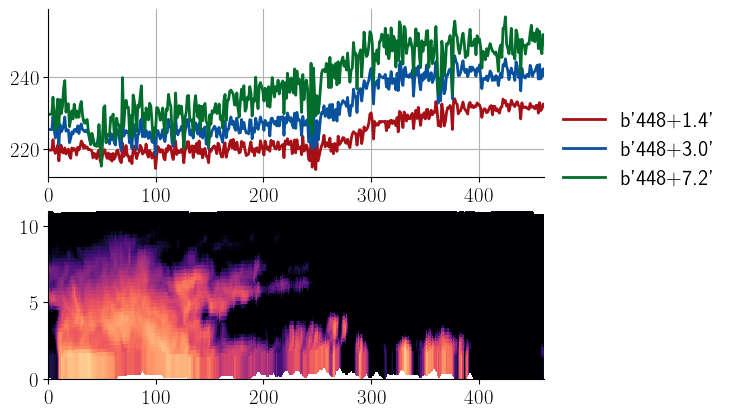

In [23]:
data = [
    tbs_ismar[:, 14],
    tbs_ismar[:, 15],
    tbs_ismar[:, 16],
]
names = map(lambda x: x.data, ISMAR.channel[14:17])
plot_channels(data, names)

In [24]:
y_ismar[:, 7:10] = tbs_ismar[:, 14:17]
y_ismar_nedt[:, 7:10] = errors_ismar[:, 14:17]

## 664 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


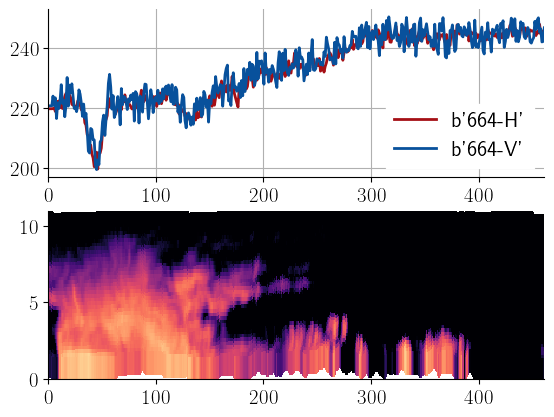

In [25]:
data = [
    tbs_ismar[:, 17],
    tbs_ismar[:, 18],
]
names = map(lambda x: x.data, ISMAR.channel[17:19])
plot_channels(data, names)

In [26]:
y_ismar[:, 10] = tbs_ismar[:, 17]
y_ismar_nedt[:, 10] = errors_ismar[:, 17]

## 874 GHz

<xarray.DataArray 'dbz' (time: 422, bins: 45)>
array([[-15.47, -15.47, -15.47, ..., -26.  , -26.  , -26.  ],
       [-15.04, -15.04, -15.04, ..., -25.86, -24.58, -26.  ],
       [-15.65, -15.65, -15.65, ..., -26.  , -26.  , -26.  ],
       ...,
       [-19.85, -19.85, -19.85, ..., -26.  , -26.  , -24.12],
       [-17.81, -17.81, -17.81, ..., -26.  , -26.  , -26.  ],
       [-18.78, -18.78, -18.78, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-22T13:15:32 ... 2019-03-22T13:16:39
Dimensions without coordinates: bins


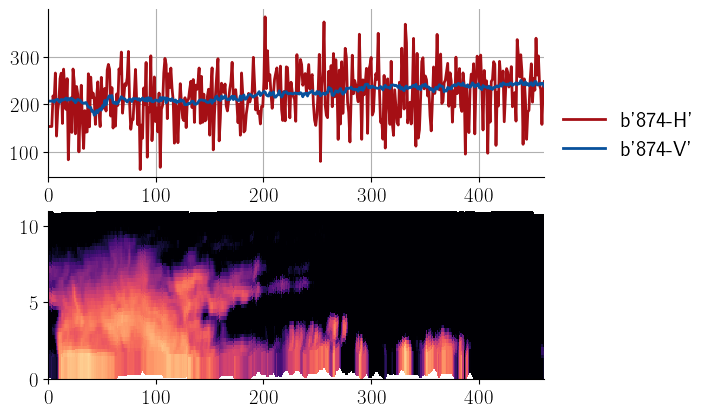

In [27]:
data = [
    tbs_ismar[:, 19],
    tbs_ismar[:, 20],
]
names = map(lambda x: x.data, ISMAR.channel[19:])
plot_channels(data, names)

In [28]:
y_ismar[:, 11] = tbs_ismar[:, 20]
y_ismar_nedt[:, 11] = errors_ismar[:, 20]

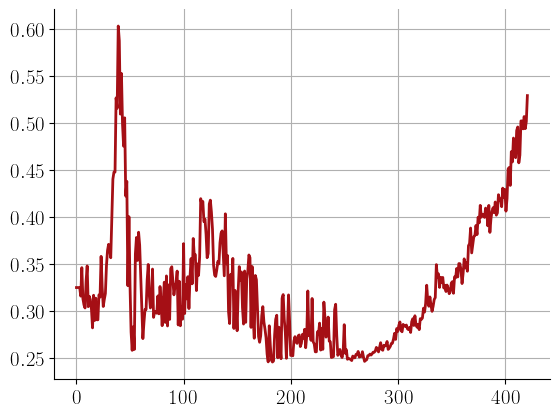

In [29]:
plt.plot(y_ismar_nedt[:, 11])
plt.show()

In [30]:
RADAR.dbz.min()


<xarray.DataArray 'dbz' ()>
array(-26.)

In [33]:
import xarray as xr
input_data = {
    # Atmosphere
    "latitude": (("rays",), RADAR.latitude.data),
    "longitude": (("rays",), RADAR.longitude.data),
    "altitude": (("rays", "levels",), RADAR.height.data),
    "pressure": (("rays", "levels"), ATMOSPHERE.pressure.data),
    "temperature": (("rays", "levels"), ATMOSPHERE.temperature.data),
    "cloud_water": (("rays", "levels"), ATMOSPHERE.cloud_water.data),
    #"H2O": (("rays", "levels"), ATMOSPHERE.relative_humidity / 100.0),
    "H2O": (("rays", "levels"), ATMOSPHERE.water_vapor.data),
    "H2O_xa": (("rays", "levels"), ATMOSPHERE.relative_humidity.data),
    "O2": (("rays", "levels"), ATMOSPHERE.oxygen.data),
    "O3": (("rays", "levels"), ATMOSPHERE.ozone.data),
    "N2": (("rays", "levels"), ATMOSPHERE.nitrogen.data),
    # Surface variables
    "sea_surface_temperature": (("rays",), ATMOSPHERE.sea_surface_temperature.data),
    "wind_u": (("rays",), ATMOSPHERE.u10.data),
    "wind_v": (("rays",), ATMOSPHERE.v10.data),
    "surface_wind_speed": (("rays",
                            np.sqrt(ATMOSPHERE.u10.data ** 2 +
                                    ATMOSPHERE.v10.data ** 2))),
    # Observations
    "y_cloud_sat": (("rays", "range_bins"), RADAR.dbz.data),
    "y_cloud_sat_nedt": (("rays", "range_bins"), 0.5 * np.ones_like(RADAR.dbz) + RADAR.nedt.data),
    "cloud_sat_range_bins": (("rays", "range_bin_boundaries"), RADAR.range_bins.data),
    "y_marss": (("rays", "marss_channels"), y_marss),
    "y_marss_nedt": (("rays", "marss_channels"), y_marss_nedt),
    "marss_sensor_position": (("rays",), MARSS.altitude.data),
    "marss_sensor_line_of_sight": (("rays",), 180 * np.ones(MARSS.altitude.size)),
    "y_ismar": (("rays", "ismar_channels"), y_ismar),
    "y_ismar_nedt": (("rays", "ismar_channels"), y_ismar_nedt),
    "ismar_sensor_position": (("rays",), ISMAR.altitude.data),
    "ismar_sensor_line_of_sight": (("rays",), 180 * np.ones(ISMAR.altitude.size))
}
dataset = xr.Dataset(input_data)
dataset.to_netcdf("../data/input_c161.nc")